Table or dataset showing number of registered users and the number of click these users make and average they place

In [40]:
import pandas as pd

events_users = pd.read_csv('/content/events_users_join.csv')
order_items = pd.read_csv('/content/order_items.csv')


In [41]:
events_users.dtypes

,0
id_even,int64
user_id,int64
sequence_number,int64
session_id,object
created_at,object
ip_address,object
city,object
state,object
postal_code,object
browser,object


In [37]:
events_users['user_id'] = events_users['user_id'].fillna(0).astype(int)

In [42]:
nulos = events_users.isnull().sum()
print(nulos)

id_even               0
user_id               0
sequence_number       0
session_id            0
created_at         5982
ip_address            0
city                  0
state                 0
postal_code           0
browser               0
traffic_source        0
uri                   0
event_type            0
first_name            0
last_name             0
email                 0
age                   0
gender                0
street_address        1
country               1
latitude              1
longitude             1
dtype: int64


In [13]:
events_users.to_csv('/content/events_users.csv', index=False)

events_users = pd.read_csv('/content/events_users.csv')

events_users.head()

,id_even,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,...,event_type,first_name,last_name,email,age,gender,street_address,country,latitude,longitude
0,1889001,0,3,649eb2f9-4965-4b9f-9f35-931c91a59785,2021-04-24 05:29:00+00:00,28.83.46.247,São Paulo,São Paulo,02675-031,Safari,...,cancel,Unregistered,Unregistered,Unregistered,Unknown,Unknown,Unknown,Unknown,0.0,0.0
1,2220610,0,3,25ab2d2f-1d91-499d-890c-b5c4cb8b4522,2020-08-30 13:33:00+00:00,42.146.37.173,São Paulo,São Paulo,02675-031,Safari,...,cancel,Unregistered,Unregistered,Unregistered,Unknown,Unknown,Unknown,Unknown,0.0,0.0
2,1545947,0,3,c194df8a-19e0-4df5-9af0-5d1cc35e7165,2020-07-04 08:47:00+00:00,9.66.211.17,São Paulo,São Paulo,02675-031,Firefox,...,cancel,Unregistered,Unregistered,Unregistered,Unknown,Unknown,Unknown,Unknown,0.0,0.0
3,1398855,0,3,e240ddc0-e9f4-4749-8945-e72a9e5c39f3,2022-07-31 10:01:00+00:00,7.81.94.186,São Paulo,São Paulo,02675-031,Chrome,...,cancel,Unregistered,Unregistered,Unregistered,Unknown,Unknown,Unknown,Unknown,0.0,0.0
4,1668196,0,3,6b603097-4982-4c92-b9e4-363b5fd453a0,2024-02-04 06:19:00+00:00,78.218.167.53,São Paulo,São Paulo,02675-031,Chrome,...,cancel,Unregistered,Unregistered,Unregistered,Unknown,Unknown,Unknown,Unknown,0.0,0.0


In [43]:

events_users.fillna({
    'first_name': 'Unregistered',
    'last_name': 'Unregistered',
    'email': 'Unregistered',
    'age': 'Unknown',
    'gender': 'Unknown',
    'street_address': 'Unknown',
    'country': 'Unknown',
    'city': 'Unknown',
    'latitude': 0,
    'longitude': 0
}, inplace=True)
print(events_users.isnull().sum())

id_even               0
user_id               0
sequence_number       0
session_id            0
created_at         5982
ip_address            0
city                  0
state                 0
postal_code           0
browser               0
traffic_source        0
uri                   0
event_type            0
first_name            0
last_name             0
email                 0
age                   0
gender                0
street_address        0
country               0
latitude              0
longitude             0
dtype: int64


In [45]:
registered = event_users['first_name'].notnull().sum()

total_users = registered + unregistered

print(f"Registered: {registered}")

Registered: 981557


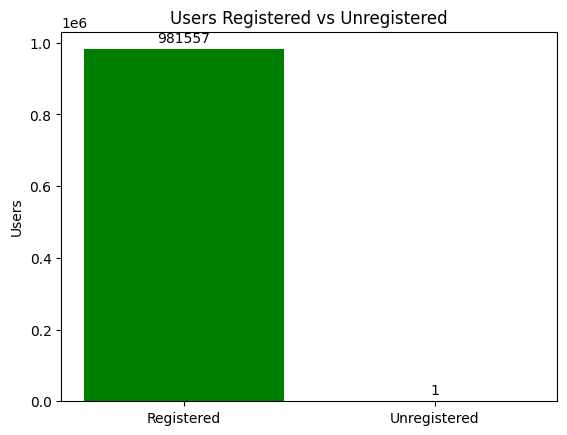

In [17]:
# make no sense this one now.
import matplotlib.pyplot as plt


labels = ['Registered', 'Unregistered']
values = [registered, unregistered]
plt.bar(labels, values, color=['green', 'red'])

for i, value in enumerate(values):
    plt.text(i, value + 20000, str(value), ha='center')

plt.title('Users Registered vs Unregistered')
plt.ylabel('Users')
plt.show()


In [46]:
total = event_users.shape[0]
print(total)

981558


In [ ]:
order_items = pd.read_csv('/content/order_items.csv')


In [ ]:
order_items.dtypes

,0
id,int64
order_id,int64
user_id,int64
product_id,int64
inventory_item_id,int64
status,object
created_at,object
shipped_at,object
delivered_at,object
returned_at,object


In [47]:
event_order_join = order_items.merge(event_users, how='left', on='user_id')


In [25]:
event_order_join.to_csv('/content/event_order_join.csv', index=False)


In [51]:
clicks_registered = event_order_join.groupby('user_id')['session_id'].count().sum()

print(f"Total clicks by registered users: {clicks_registered}")


Total clicks by registered users: 954667


In [28]:
sales_by_registered = event_order_join[event_order_join['first_name'].notnull()].groupby('user_id')['order_id'].count().sum()

print(f"Total sales by registered users: {sales_by_registered}")
print(f"Total sales by unregistered users: {sales_by_unregistered}")


Total sales by registered users: 954667
Total sales by unregistered users: 41520


In [31]:
duplicates_order_id = event_order_join[event_order_join.duplicated(subset=['order_id', 'user_id'], keep=False)]
print(f'Duplicated orders: {duplicates_order_id.shape[0]}')


Duplicated orders: 968001


In [ ]:
event_order_join = order_items.drop_duplicates(subset=['order_id', 'user_id'], keep='first')

print(f"After cleaning duplicates: {order_items_cleaned.shape[0]} filas")


After cleaning duplicates: 124980 filas


In [32]:
clicks_registered = event_users[event_users['first_name'].notnull()].groupby('user_id')['session_id'].count().sum()
clicks_unregistered = event_users[event_users['first_name'].isnull()].groupby('user_id')['session_id'].count().sum()

sales_by_registered = event_order_join[event_order_join['first_name'].notnull()].groupby('user_id')['order_id'].count().sum()
sales_by_unregistered = event_order_join[event_order_join['first_name'].isnull()].groupby('user_id')['order_id'].count().sum()

print(f"Total clicks by registered users: {clicks_registered}")
print(f"Total clicks by unregistered users: {clicks_unregistered}")
print(f"Total sales by registered users: {sales_by_registered}")
print(f"Total sales by unregistered users: {sales_by_unregistered}")



Total clicks by registered users: 981557
Total clicks by unregistered users: 1
Total sales by registered users: 954667
Total sales by unregistered users: 41520


In [ ]:
event_users_nonull = event_users.dropna(subset=['first_name'])


Labels: ['Clicks by Registered Users', 'Clicks by Unregistered Users', 'Purchases by Registered Users', 'Purchases by Unregistered Users']
Values: [1200000, 950000, 350000, 45000]


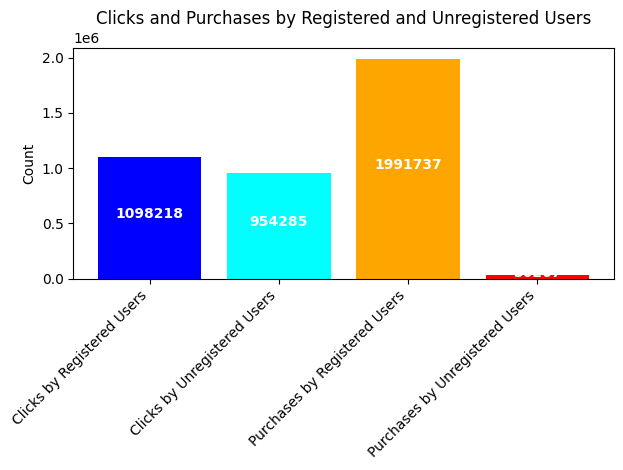

In [ ]:
print(f"Labels: {labels}")
print(f"Values: {valores}")

labels = ['Clicks by Registered Users', 'Clicks by Unregistered Users',
          'Purchases by Registered Users', 'Purchases by Unregistered Users']

valores = [clicks_registered, clicks_unregistered,
           sales_by_registered, sales_by_unregistered]

colors = ['blue', 'cyan', 'Blue', 'cyan']

plt.bar(labels, valores, color=colors)

plt.xticks(rotation=45, ha='right')

for i, value in enumerate(valores):
    plt.text(i, value * 0.5, str(value), ha='center', color='white', weight='bold')

plt.title('Clicks and Purchases by Registered and Unregistered Users')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
average_clicks_registrados = clicks_registered / sales_by_registered if sales_by_registered != 0 else 0
average_clicks_no_registrados = clicks_unregistered / sales_by_unregistered if sales_by_unregistered != 0 else 0

print(f"Average clicks per purchase (registered users): {average_clicks_registrados:.2f}")
print(f"Average clicks per purchase (unregistered users): {average_clicks_no_registrados:.2f}")


Average clicks per purchase (registered users): 3.43
Average clicks per purchase (unregistered users): 21.11


In [ ]:
average_items_per_registered_user = order_event_join[order_event_join['first_name'].notnull()].groupby('user_id')['inventory_item_id'].count().mean()
average_items_per_unregistered_user = order_event_join[order_event_join['first_name'].isnull()].groupby('user_id')['inventory_item_id'].count().mean()

print(f"Average number of items ordered per registered user: {average_items_per_registered_user:.2f}")
print(f"Average number of items ordered per unregistered user: {average_items_per_unregistered_user:.2f}")


Average number of items ordered per registered user: 31.19
Average number of items ordered per unregistered user: 2.26


In [ ]:
order_event_join.to_csv('/content/order_event_join.csv', index=False)

In [ ]:
from google.colab import files
files.download('/content/order_event_join.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>